Enter 'url' for a web image or 'local' for a local image:  url
Enter the URL of the image:  https://fal.media/files/monkey/rgTBTjPfNxrwXIyLN6HvN.png


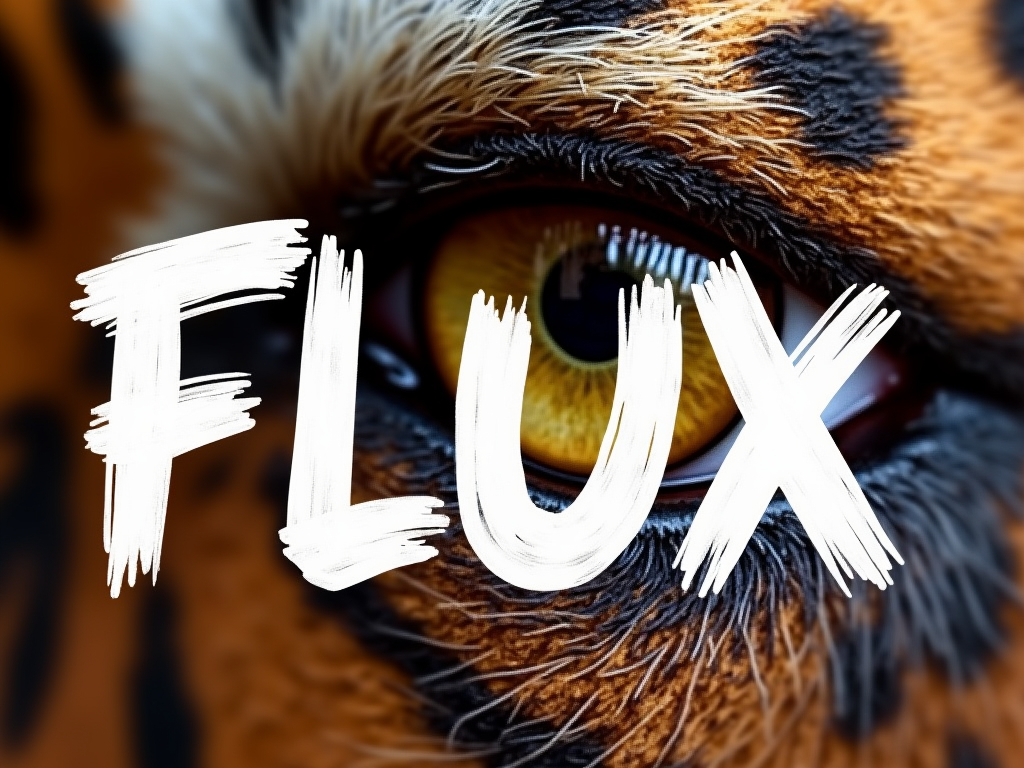

Q: What is happening in this image?
A: The image shows the close-up of a tiger's eye with the word "FLUX" written over it in white brushstrokes. The eye is looking directly at the viewer, and the word "FLUX" is covering most of it. The tiger's fur is visible around the eye, and the image is blurry and out of focus.

Q: What objects can be seen?
A: The image shows a close-up of an animal's eye, with the word "FLUX" written over it in white paint. The eye is yellow and black, with long eyelashes. The animal's fur is visible around the eye, and it is brown and black. The image appears to be a macro shot taken up close.

Q: Are there any animals in the picture?
A: Yes, there is a tiger in the image.  You can see the tiger's eye and fur.

Q: Is this a natural or man-made environment?
A: This is a natural environment. It is a close-up of an animal's eye, likely a tiger.



In [15]:
#Visual Question Answering from URL Image With Already defined Questions
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display
import google.generativeai as genai

# Bold formatting for output
BOLD_BEGIN = "\033[1m"
BOLD_END = "\033[0m"

# Set the API key directly in the code
api_key = "Your API key"

# Ensure the API key is set
if not api_key:
    raise ValueError("API_KEY must be set.")

# Configure the generative AI client
genai.configure(api_key=api_key)

# Instantiate the Gemini model specifically for vision
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

# Function to load and display the image from a URL
def display_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)
    return img

# Function to load and display a local image
def display_local_image(img_path):
    img = Image.open(img_path)
    display(img)
    return img

# List of questions for VQA
vqa_questions = [
    "What is happening in this image?",
    "What objects can be seen?",
    "Are there any animals in the picture?",
    "Is this a natural or man-made environment?"
]

# Function to process image and ask VQA questions
def process_image(url=None, local_path=None):
    if url:
        img = display_image(url)
    elif local_path:
        img = display_local_image(local_path)
    else:
        raise ValueError("Either a URL or local path must be provided.")

    # Iterate over questions and perform VQA
    for question in vqa_questions:
        response = model.generate_content([question, img])
        response.resolve()

        # Output the VQA response
        print(f"{BOLD_BEGIN}Q:{BOLD_END} {question}")
        print(f"{BOLD_BEGIN}A:{BOLD_END} {response.text}\n")

# User input for image source
image_source = input("Enter 'url' for a web image or 'local' for a local image: ").strip().lower()

if image_source == 'url':
    image_url = input("Enter the URL of the image: ").strip()
    process_image(url=image_url)
elif image_source == 'local':
    local_image_path = input("Enter the path to the local image: ").strip()
    process_image(local_path=local_image_path)
else:
    print("Invalid input. Please enter 'url' or 'local'.")
